# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['MEDV'])
y = data['MEDV']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
from sklearn.linear_model import LinearRegression
# Initialize the model
model = LinearRegression()
# Train the model on the training data
model.fit(X_train, y_train)
# Generate predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
#print("Training:\n", y_train_pred)
#print("Test:\n",y_test_pred)

## 3. Calculate and print R-squared for both the training and the testing set.

In [7]:
# Calculate R-squared for training and testing sets
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

# Print the results
print(f"R-squared for Training Set: {r2_train}")
print(f"R-squared for Testing Set: {r2_test}")

R-squared for Training Set: 0.7508856358979673
R-squared for Testing Set: 0.6687594935356317


## 4. Calculate and print mean squared error for both the training and the testing set.

In [8]:
# Your code here :
mean_squared_error_train = ((y_train - y_train_pred) ** 2).mean()
mean_squared_error_test = ((y_test - y_test_pred) ** 2).mean()
print(f"Mean Squared Error for Training Set: {mean_squared_error_train}")
print(f"Mean Squared Error for Testing Set: {mean_squared_error_test}")

Mean Squared Error for Training Set: 21.641412753226312
Mean Squared Error for Testing Set: 24.291119474973538


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [9]:
# Your code here :
mean_absolute_error = abs(y_train - y_train_pred).mean()
print(f"Mean Absolute Error for Training Set: {mean_absolute_error}")
mean_absolute_error = abs(y_test - y_test_pred).mean()
print(f"Mean Absolute Error for Testing Set: {mean_absolute_error}")

Mean Absolute Error for Training Set: 3.3147716267832252
Mean Absolute Error for Testing Set: 3.1890919658878416


## Classification Model Evaluation

In [10]:
from sklearn.datasets import load_iris
data = load_iris()

In [11]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [12]:
column_names = data.feature_names

In [13]:
df = pd.DataFrame(data['data'],columns=column_names)

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
target = pd.DataFrame(data.target)

In [16]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [18]:
# Your code here :
from sklearn.model_selection import train_test_split
X = df
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [19]:
# Your code here :
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
#print("Training:\n", y_train_pred) 
#print("Test:\n",y_test_pred)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [20]:
# Your code here :
accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)
print("Training accuracy: ", accuracy_train)
print("Test accuracy: ", accuracy_test)

Training accuracy:  0.975
Test accuracy:  1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [21]:
#below line of code is used to get the accuracy of the model
print(y.value_counts(normalize=True))

0
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64


In [22]:
# Your code here :
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_train = balanced_accuracy_score(y_train, y_train_pred)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)

print("Balanced accuracy for training set: ", balanced_accuracy_train)
print("Balanced accuracy for test set: ", balanced_accuracy_test)

Balanced accuracy for training set:  0.975609756097561
Balanced accuracy for test set:  1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [23]:
# Your code here :
from sklearn.metrics import precision_score
precise_score_train = precision_score(y_train, y_train_pred, average='macro')
precise_score_test = precision_score(y_test, y_test_pred, average='macro')
print("Precise score for training set: ", precise_score_train)
print("Precise score for test set: ", precise_score_test)        

Precise score for training set:  0.9761904761904763
Precise score for test set:  1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [24]:
# Your code here :
from sklearn.metrics import recall_score
recall_score_train = recall_score(y_train, y_train_pred, average='macro')
recall_score_test = recall_score(y_test, y_test_pred, average='macro')
print("Recall score for training set: ", recall_score_train)
print("Recall score for test set: ", recall_score_test)           

Recall score for training set:  0.975609756097561
Recall score for test set:  1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [25]:
# Your code here :
f1_train = 2 * (precise_score_train * recall_score_train) / (precise_score_train + recall_score_train)
f1_test = 2 * (precise_score_test * recall_score_test) / (precise_score_test + recall_score_test)
print("F1 score for training set: ", f1_train)
print("F1 score for test set: ", f1_test)

F1 score for training set:  0.9759000297530497
F1 score for test set:  1.0


## 13. Generate confusion matrices for both the training and the testing set.

In [26]:
# Your code here :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
print(confusion_matrix(y_test, y_test_pred))

[[40  0  0]
 [ 0 38  3]
 [ 0  0 39]]
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [27]:
# Have fun here ! trying classification algorithms
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))
print("Classification report for training set: ", classification_report(y_train, y_train_pred))
print("Classification report for test set: ", classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        39

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.97       120
weighted avg       0.98      0.97      0.97       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classification report for training set:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.93      0.96        41
           2       0.93      1.00 

0    31
dtype: int64


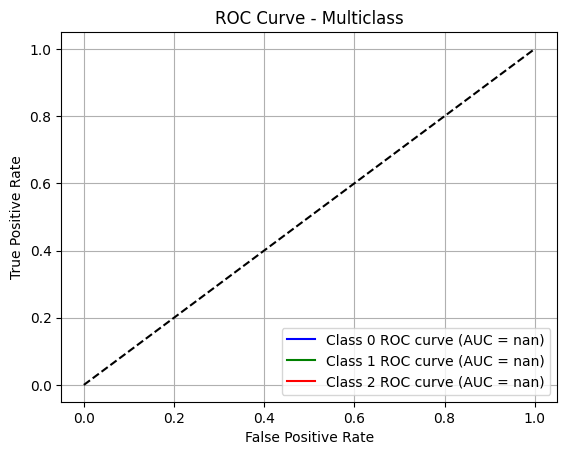

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Simulate a 3-class classification problem
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize

# Your actual labels (e.g., drug types)
# y = my_data["Drug"]
# y = label_binarize(y, classes=['drugY', 'drugX', 'drugC'])

# Example dummy 3-class data
X, y = make_classification(n_samples=300, n_features=10, n_classes=3, n_informative=5, n_clusters_per_class=1)
y = label_binarize(y, classes=['drugY', 'drugC', 'drugX'])  # Now y is one-hot encoded
print(y_test.sum(axis=0))
n_classes = y.shape[1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# One-vs-Rest classifier
classifier = OneVsRestClassifier(DecisionTreeClassifier())
classifier.fit(X_train, y_train)

# Predict probabilities
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'green', 'red']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# still need to learn about the ROC Curve and other metrics more to perform more tests. 